<a href="https://colab.research.google.com/github/vyankateshgithubber/speech-analyer/blob/main/EmotionAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Emoji Detector**

We use psychExp datasets. Each instance is associated with seven kinds of emotions: joy, fear, anger, sadness, disgust, shame, guilt.

> each line contains text and its label, formatted with: 
[<label>] <text>.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_dataset(file_name):
  data = {"Text":[],"Label":[]}
  with open(file_name, 'r') as f: 
    for line in f:
      line = line.strip()
      label = ' '.join(line[1:line.find("]")].strip().split())
      text = line[line.find("]")+1:].strip()
      data["Label"].append(label)
      data["Text"].append(text)
  df = pd.DataFrame(data)
  return df

In [ ]:
file_name = "/Datasets/psychExp.txt"
df = create_dataset(file_name)

In [ ]:
df

,Text,Label
0,"During the period of falling in love, each tim...",1. 0. 0. 0. 0. 0. 0.
1,When I was involved in a traffic accident.,0. 1. 0. 0. 0. 0. 0.
2,When I was driving home after several days of...,0. 0. 1. 0. 0. 0. 0.
3,When I lost the person who meant the most to me.,0. 0. 0. 1. 0. 0. 0.
4,The time I knocked a deer down - the sight of ...,0. 0. 0. 0. 1. 0. 0.
...,...,...
7475,Two years back someone invited me to be the tu...,0. 0. 1. 0. 0. 0. 0.
7476,I had taken the responsibility to do something...,0. 0. 0. 1. 0. 0. 0.
7477,I was at home and I heard a loud sound of spit...,0. 0. 0. 0. 1. 0. 0.
7478,I did not do the homework that the teacher had...,0. 0. 0. 0. 0. 1. 0.


In [ ]:
df.head()

,Text,Label
0,"During the period of falling in love, each tim...",1. 0. 0. 0. 0. 0. 0.
1,When I was involved in a traffic accident.,0. 1. 0. 0. 0. 0. 0.
2,When I was driving home after several days of...,0. 0. 1. 0. 0. 0. 0.
3,When I lost the person who meant the most to me.,0. 0. 0. 1. 0. 0. 0.
4,The time I knocked a deer down - the sight of ...,0. 0. 0. 0. 1. 0. 0.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7480 entries, 0 to 7479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7480 non-null   object
 1   Label   7480 non-null   object
dtypes: object(2)
memory usage: 117.0+ KB


In [ ]:
df.describe()

,Text,Label
count,7480,7480
unique,7415,7
top,When my grandfather died.,1. 0. 0. 0. 0. 0. 0.
freq,8,1084


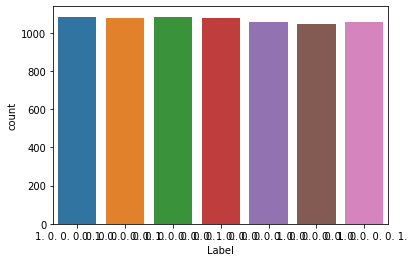

In [ ]:
sns.countplot(data=df,x="Label")

In [ ]:
def convert_label(label):
  emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
  items = list(map(float, label.split()))
  label = ""
  for idx in range(len(items)): 
    if items[idx] == 1: 
      label += emotions[idx] + " "
  return label.strip()

In [53]:
Y = df["Label"].apply(convert_label)
Y

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7475      anger
7476    sadness
7477    disgust
7478      shame
7479      guilt
Name: Label, Length: 7480, dtype: object

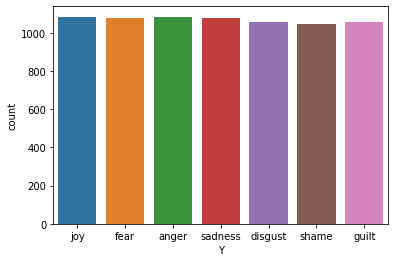

In [ ]:
sns.countplot(x="Y",data=df)

In [60]:
import string

In [63]:
def message_cleaning(message):
  Test_punc_removed = [ char for char in message if char not in string.punctuation ]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  return Test_punc_removed_join

In [90]:
 from sklearn.feature_extraction.text import CountVectorizer
 vectorizer = CountVectorizer(analyzer=message_cleaning)
 text = vectorizer.fit_transform(df['Text'])

In [91]:
print(vectorizer.get_feature_names())

[' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¦', '÷']


In [92]:
print(text.toarray())

[[22  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]
 [34  1  0 ...  0  0  0]
 ...
 [35  0  0 ...  0  0  0]
 [18  0  0 ...  0  0  0]
 [16  0  0 ...  0  0  0]]


In [93]:
print(emoji.toarray())

[[6 6 1]
 [6 6 1]
 [6 6 1]
 ...
 [6 6 1]
 [6 6 1]
 [6 6 1]]


In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(text,Y,test_size=0.2)
X_train.shape,y_train.shape

((5984, 65), (5984,))

In [95]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [96]:
y_predict_class = NB_classifier.predict(X_train)
y_predict_class

array(['anger', 'anger', 'fear', ..., 'joy', 'joy', 'disgust'],
      dtype='<U7')

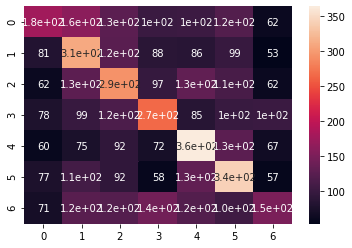

In [97]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_train,y_predict_class)
sns.heatmap(cm,annot = True)

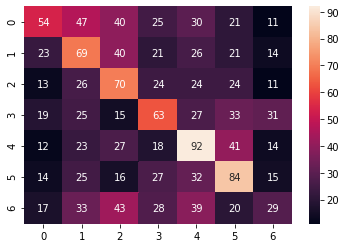

In [98]:
y_predict_class = NB_classifier.predict(X_test)
y_predict_class
cm = confusion_matrix(y_test,y_predict_class)
sns.heatmap(cm,annot = True)

In [106]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict_class)
accuracy

0.3355614973262032

In [107]:
print(classification_report(y_test,y_predict_class))

              precision    recall  f1-score   support

       anger       0.37      0.27      0.31       228
     disgust       0.30      0.36      0.33       214
        fear       0.31      0.38      0.34       192
       guilt       0.30      0.32      0.31       213
         joy       0.39      0.45      0.42       227
     sadness       0.37      0.42      0.40       213
       shame       0.26      0.14      0.18       209

    accuracy                           0.34      1496
   macro avg       0.33      0.34      0.33      1496
weighted avg       0.33      0.34      0.33      1496



In [108]:
# trainig with complete dataset
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(text,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [109]:
testing_sample = ['shit food ,made me sick']
testing_sample_vectrizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_vectrizer)
test_predict

array(['disgust'], dtype='<U7')

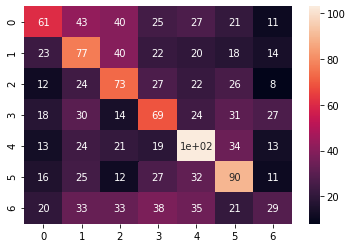

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict_class = NB_classifier.predict(X_test)
y_predict_class
cm = confusion_matrix(y_test,y_predict_class)
sns.heatmap(cm,annot = True)

In [105]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict_class)
accuracy

0.3355614973262032

In [110]:
print(classification_report(y_test,y_predict_class))

              precision    recall  f1-score   support

       anger       0.37      0.27      0.31       228
     disgust       0.30      0.36      0.33       214
        fear       0.31      0.38      0.34       192
       guilt       0.30      0.32      0.31       213
         joy       0.39      0.45      0.42       227
     sadness       0.37      0.42      0.40       213
       shame       0.26      0.14      0.18       209

    accuracy                           0.34      1496
   macro avg       0.33      0.34      0.33      1496
weighted avg       0.33      0.34      0.33      1496

